# 1. Import the necessary libraries

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

D:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Read the data as a data frame

In [2]:
#Reading data as a DataFrame
df=pd.read_csv("insurance.csv")

In [3]:
# Displaying first five values in DataFrame, to understand what this DataFrame consists of.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Perform basic EDA which should include the following and print out your insights at every step

## a. Shape of the data

In [4]:
print("(Rows,Columns) ::",df.shape)

(Rows,Columns) :: (1338, 7)


## b. Data type of each attribute

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print("The data has 1338 instances with 7 attributes.")
print("Of which 2 are of integer type, 2 are of float type and 3 are of object type(Strings in the column)")

The data has 1338 instances with 7 attributes.
Of which 2 are of integer type, 2 are of float type and 3 are of object type(Strings in the column)


## c. Checking the presence of missing values

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
print("No null values in given DataFrame")

No null values in given DataFrame


## d. 5 point summary of numerical attributes

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
print("Following are the 5 point summary insights are as follows:-")
print("1.Data looks genuine as all the statistics seems reasonable.")
print("2.Data represntation of age column seems to be the true age distribution of the adult population.")
print("3.75% of the people have 2 or less children.Hence very few people have more than 2 children.")

Following are the 5 point summary insights are as follows:-
1.Data looks genuine as all the statistics seems reasonable.
2.Data represntation of age column seems to be the true age distribution of the adult population.
3.75% of the people have 2 or less children.Hence very few people have more than 2 children.


## e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

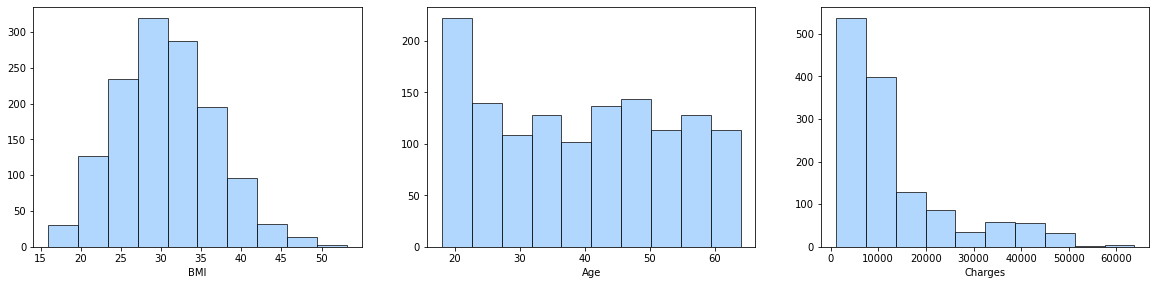

In [11]:
#Plotting to see the distribution of 'bmi', 'age' and 'charges'

plt.style.use('seaborn-pastel')
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, edgecolor = 'black', alpha = 0.7)
plt.xlabel('BMI')

plt.subplot(3,3,2)
plt.hist(df.age, edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(3,3,3)
plt.hist(df.charges, edgecolor = 'black', alpha = 0.7)
plt.xlabel('Charges')

plt.show()

In [12]:
print("Insights from distribution of 'bmi', 'age' and 'charges' are as follows:-")
print("1.BMI looks normally distributed.")
print("2.Age seems to be distributed uniformly.")
print("3.Charges is highly skewed.")

Insights from distribution of 'bmi', 'age' and 'charges' are as follows:-
1.BMI looks normally distributed.
2.Age seems to be distributed uniformly.
3.Charges is highly skewed.


## f.Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [13]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},index=['bmi','age','charges'])
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


In [14]:
print("Insights from skewness of ‘bmi’, ‘age’ and ‘charges’ columns are as follows:-")
print("1.Skewnwess of bmi is very less.")
print("2.Little to no skewness in age as its uniformly distributed.")
print("3.Charges is positively skewed.")

Insights from skewness of ‘bmi’, ‘age’ and ‘charges’ columns are as follows:-
1.Skewnwess of bmi is very less.
2.Little to no skewness in age as its uniformly distributed.
3.Charges is positively skewed.


## g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

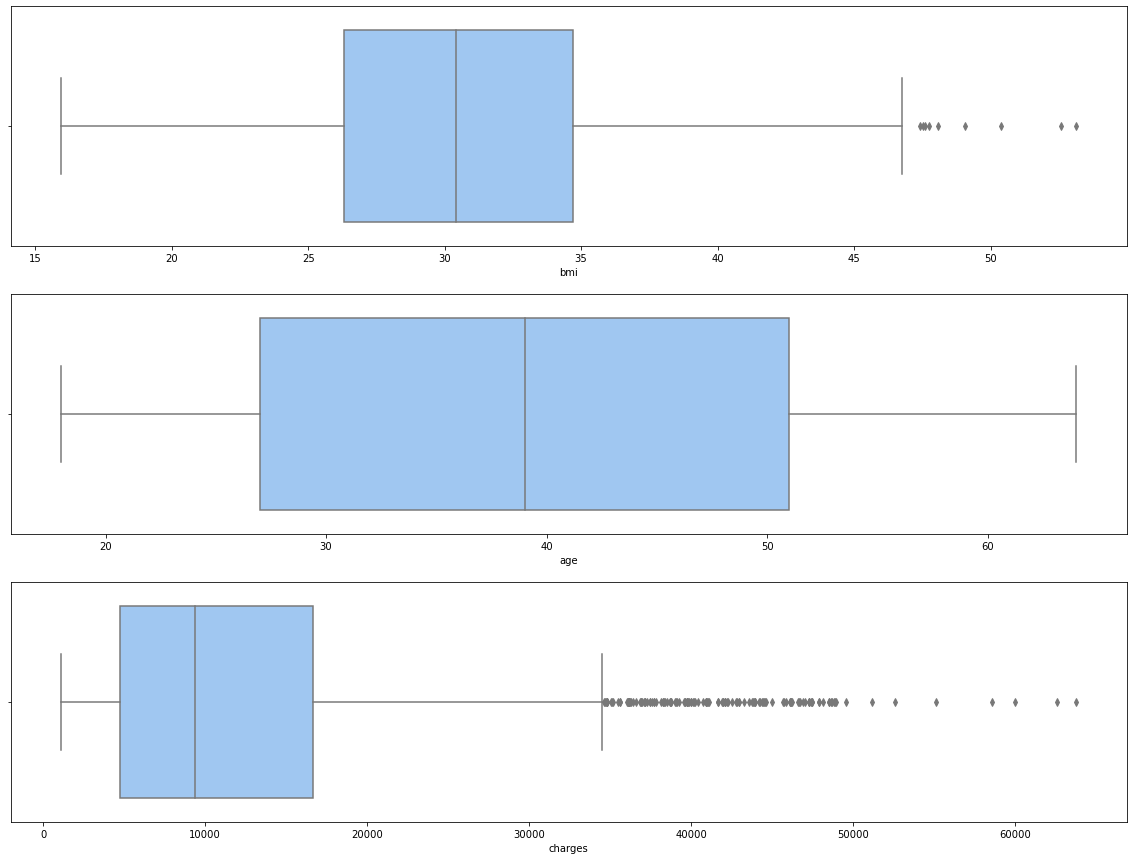

In [15]:
#Checking for the outliers visually

plt.style.use('seaborn-pastel')
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x=df.bmi)

plt.subplot(3,1,2)
sns.boxplot(x=df.age)

plt.subplot(3,1,3)
sns.boxplot(x=df.charges)

plt.show()

In [16]:
print("Insights from checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns are as follows:-")
print("1.BMI has a few outliers.")
print("2.Age has no outliers as its uniformly distributed.")
print("3.Charges has quite a lot of outliers.")

Insights from checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns are as follows:-
1.BMI has a few outliers.
2.Age has no outliers as its uniformly distributed.
3.Charges has quite a lot of outliers.


In [17]:
#Confirming the presence of outliers statistically
Q1=df.quantile(q=0.25)
Q3=df.quantile(q=0.75)
IQR=Q3-Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

age           0
bmi           9
charges     139
children      0
region        0
sex           0
smoker        0
dtype: int64

In [18]:
print("This confirms that bmi has few outliers, age has no outliers and charges has quite a lot of outliers.")

This confirms that bmi has few outliers, age has no outliers and charges has quite a lot of outliers.


## h. Distribution of categorical columns (include children)

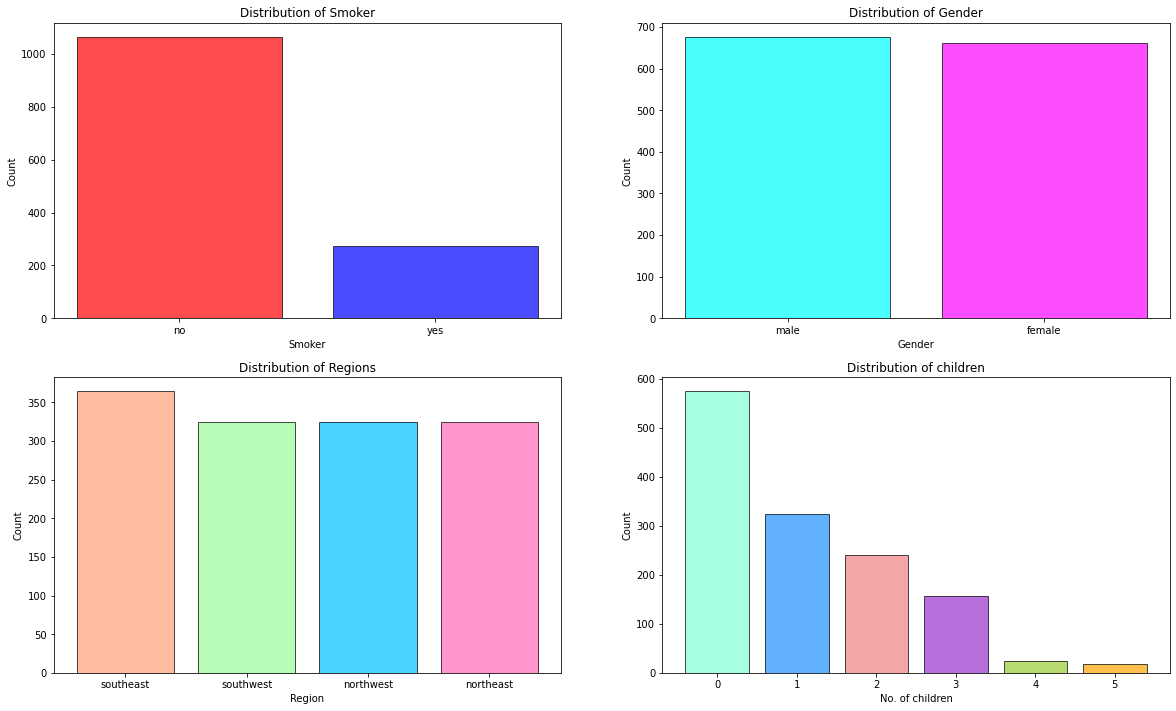

In [19]:
plt.figure(figsize=(20,25))

x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = ['red','blue'],edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Distribution of Smoker')

x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color=['cyan','magenta'],edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = ['lightsalmon','palegreen','deepskyblue','hotpink'],edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count')
plt.title("Distribution of Regions")

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = ['aquamarine','dodgerblue','lightcoral','darkorchid','yellowgreen','orange'],edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count')
plt.title("Distribution of children")

plt.show()

In [20]:
print("Insights from distribution of categorical columns are as follows:-")
print("1.There are a lot more non-smokers than there are smokers in the data.")
print("2.Instances are distributed evenly accross all regions in the data.")
print("3.Gender is also evenly distributed in the data.")
print("4.Very few instances have 4 or 5 children in the data.")

Insights from distribution of categorical columns are as follows:-
1.There are a lot more non-smokers than there are smokers in the data.
2.Instances are distributed evenly accross all regions in the data.
3.Gender is also evenly distributed in the data.
4.Very few instances have 4 or 5 children in the data.


## i. Pair plot that includes all the columns of the data frame

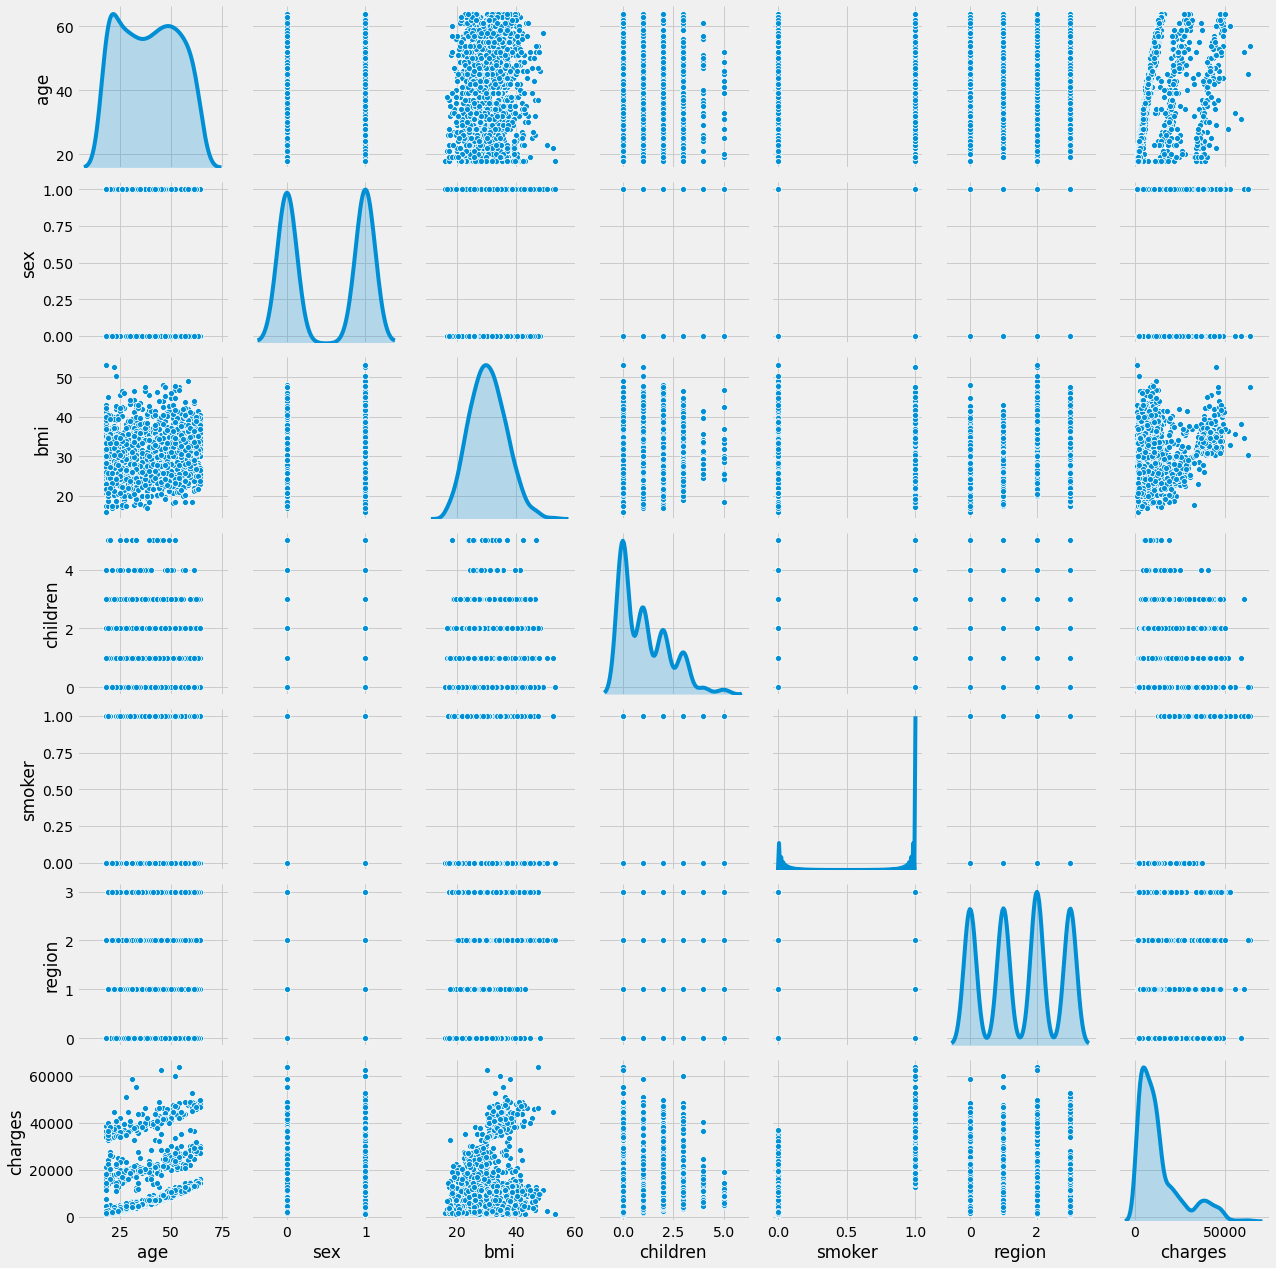

In [21]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings or object data type.
df_encoded = copy.deepcopy(df) #creating a copy of DataFrame
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
plt.style.use('fivethirtyeight')
sns.pairplot(df_encoded,diag_kind='kde')  #pairplot
plt.show()

In [22]:
print("Insights from Pair plot are as follows:-")
print("1.The only obvious correlation of 'charges' is with 'smoker.")
print("2.It seems like smokers claimed more money than non-smokers.")
print("3.Age seems to be positively correalated with charges but 3 different category of distribution is observed within themselves.")

Insights from Pair plot are as follows:-
1.The only obvious correlation of 'charges' is with 'smoker.
2.It seems like smokers claimed more money than non-smokers.
3.Age seems to be positively correalated with charges but 3 different category of distribution is observed within themselves.


# 4. Answer the following questions with statistical evidence

## a. Do charges of people who smoke differ significantly from the people who don't?

In [23]:
df.smoker.value_counts() #Checking the distribution of non-smokers and smokers

no     1064
yes     274
Name: smoker, dtype: int64

In [24]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis
print("Ho :: ",Ho)
print("Ha :: ",Ha)
print()

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print("Result::")
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Ho ::  Charges of smoker and non-smoker are same
Ha ::  Charges of smoker and non-smoker are not the same

Result::
Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


## b. Does bmi of males differ significantly from that of females?

In [25]:
df.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

In [26]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis
print("Ho :: ",Ho)
print("Ha :: ",Ha)
print()

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print("Result::")
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Ho ::  Gender has no effect on bmi
Ha ::  Gender has an effect on bmi

Result::
Gender has no effect on bmi as the p_value (0.09) > 0.05


## c. Is the proportion of smokers significantly different in different genders?

In [27]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis
print("Ho :: ",Ho)
print("Ha :: ",Ha)

Gen_vs_Smo = pd.crosstab(df['sex'],df['smoker'])  # Frequency table of sex and smoker attributes using crosstab function of pandas
Gen_vs_Smo

Ho ::  Gender has no effect on smoking habits
Ha ::  Gender has an effect on smoking habits


smoker,no,yes
sex,,
female,547,115
male,517,159


In [28]:
chi, p_value, dof, expected =  stats.chi2_contingency(Gen_vs_Smo) #Performing a Chi_square test

print("Result::")
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Result::
Gender has an effect on smoking habits as the p_value (0.007) < 0.05


## d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [29]:
# Since we have more than 2 samples here we will perform ANOVA Test to see if the distributions of bmi values for females having different number of children, are significantly different

# Before proceeding we will test for variances using Levene's test
Ho = "All input samples are from populations with equal variances."   # Stating the Null Hypothesis for levene's test
Ha = "All input samples are from populations with different variances"   # Stating the Alternate Hypothesis for levene's test
print("Ho :: ",Ho)
print("Ha :: ",Ha)
print()

#gathering data 
no_child = df[(df['sex']=='female')&(df['children']==0)]['bmi']
one_child = df[(df['sex']=='female')&(df['children']==1)]['bmi']
two_child = df[(df['sex']=='female')&(df['children']==2)]['bmi']


l_stat, p_value=stats.levene(no_child, one_child, two_child)
print("Result::")
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
    print("We can proceed with performing ANOVA Test.")


Ho ::  All input samples are from populations with equal variances.
Ha ::  All input samples are from populations with different variances

Result::
All input samples are from populations with equal variances. as the p_value (0.39) > 0.05
We can proceed with performing ANOVA Test.


In [30]:
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis for ANOVA's test
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis for ANOVA's test
print("Ho :: ",Ho)
print("Ha :: ",Ha)
print()

f_stat, p_value = stats.f_oneway(no_child,one_child,two_child) #Performing a ANOVA test

print("Result::")
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Ho ::  No. of children has no effect on bmi
Ha ::  No. of children has an effect on bmi

Result::
No. of children has no effect on bmi as the p_value (0.716) > 0.05
